In [7]:
import pandas as pd 

import numpy as np

import matplotlib 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

                                                                                                                    Klasse zum Training eines DecissionTreeClassifiers:                                                                                                                                        
__init__ 
- Methode ist der Konstruktor der Klasse:
- alle Parameter mit "=" sind nicht verpflichtend, also ist es nur path zur csv-Datei                                                                                                                                                                                                                               
- ohne Angabe des Schlüsselwortes muss die Reihenfolge eingehalten werden, mit entsprechend nicht            
                                                                                                                                                                                                     
__data__:
- Methode kann man nicht von außen aufruen, das liegt an den __ quasi das private in Python     

min_sample_split:
- Gibt für festes max_depth den besten Wert zurück, ohne den besten der Klasse zu überschreiben

train:
- übernimmt die Kombination der 3 bisher vorhandenen Einstellungen, jede Kombination wird getestet
- für jede Kombination wird f-score, precission und recall in die letzte Spalte eines numby arrays geschrieben
- nach dem Durchlaufen wird die beste Kombination ermittelt und in die Klasse geschrieben + ausgegegen
                                                                                                                                                                                                              

In [41]:
class myTree:
    def __init__(self, path, 
                 max_depthVal=None, max_depthMax=200, max_depthMin=0, 
                 min_sample_splitVal = 2, min_sample_splitMax=10, min_sample_splitMin=2, 
                 clf=None, criterionVal="entropy"):
        self.path = path
        self.trainList = self.__data()
        self.max_depthVal = max_depthVal
        self.max_depthMax = max_depthMax
        self.max_depthMin=max_depthMin
        self.min_sample_splitMax = min_sample_splitMax
        self.min_sample_splitMin = min_sample_splitMin
        self.min_sample_splitVal = min_sample_splitVal
        self.clf = clf
        self.criterionVal = criterionVal
        self.results = np.empty((3, max_depthMax-max_depthMin, min_sample_splitMax-min_sample_splitMin, 3))
    def __data(self):
        self.data = pd.read_csv(self.path)
        columnsLength = self.data.shape[1]-1
        X = self.data.iloc[:,0:columnsLength]
        y = self.data[["groupID"]].values.ravel()
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
        return [X_train, X_test, y_train, y_test]
    def out(self):
        if(self.clf == None):
            print("Modell ohne Parameter wird angelegt, da keines vorhanden:")
            self.clf = DecisionTreeClassifier(random_state=42)
            self.clf = self.clf.fit(self.trainList[0], self.trainList[2])
        predict = self.clf.predict(self.trainList[1])
        report = classification_report(self.trainList[3], predict, target_names=["Atheism", "Graphics", "Space", "Religion"])
        print(report)
        print("F-Score: ",f1_score(predict, self.trainList[3], average='macro'))
        print("Precision: ",precision_score(predict, self.trainList[3], average='macro'))
        print("Recall: ",recall_score(predict, self.trainList[3], average='macro'))
    def max_depth(self, min, max):
        self.max_depthMax = max
        self.max_depthMin = min
        f = 0
        for i in range(self.max_depthMax):
            if(i<self.max_depthMin):
                continue
            clf = DecisionTreeClassifier(random_state=42, criterion=self.criterionVal, max_depth=i, min_samples_split=self.min_sample_splitVal)
            clf = clf.fit(self.trainList[0], self.trainList[2])
            predict = clf.predict(self.trainList[1])
            if f1_score(predict, self.trainList[3], average='macro')>f:
                f = f1_score(predict, self.trainList[3], average='macro')
                self.max_depthVal = i
                self.clf =  DecisionTreeClassifier(random_state=42, criterion=self.criterionVal, max_depth=i, min_samples_split=self.min_sample_splitVal)
                self.clf = self.clf.fit(self.trainList[0], self.trainList[2])      
        return self.max_depthVal
    def min_sample_split(self):
        f = 0
        for i in range(self.min_sample_splitMax):
            if(i<self.min_sample_splitMin):
                continue
            clf = DecisionTreeClassifier(random_state=42, criterion=self.criterionVal, min_samples_split=i, max_depth=self.max_depthVal)
            clf = clf.fit(self.trainList[0], self.trainList[2])
            predict = clf.predict(self.trainList[1])
            if f1_score(predict, self.trainList[3], average='macro')>f:
                f = f1_score(predict, self.trainList[3], average='macro')
                self.min_sample_splitVal = i    
        return self.min_sample_splitVal
    def criterion(self):
        criterionList = {"entropy", "log_loss", "gini"}
        f = 0
        for criterion in criterionList:
            clf = DecisionTreeClassifier(random_state=42, criterion=criterion, min_samples_split=self.min_sample_splitVal, max_depth=self.max_depthVal)
            clf = clf.fit(self.trainList[0], self.trainList[2])
            predict = clf.predict(self.trainList[1])
            if f1_score(predict, self.trainList[3], average='macro')>f:
                f = f1_score(predict, self.trainList[3], average='macro')
                self.criterionVal = criterion
                self.clf =  DecisionTreeClassifier(random_state=42, criterion=criterion, min_samples_split=self.min_sample_splitVal, max_depth=self.max_depthVal)
                self.clf = self.clf.fit(self.trainList[0], self.trainList[2])
        return self.criterionVal  
    def train(self):
        criterionList = {"entropy", "log_loss", "gini"}
        for criterion in criterionList:
            if (criterion == "entropy"):
                index = 0
            elif (criterion=="log_loss"):
                index = 1
            else:
                index = 2
            for depth in range(self.max_depthMax):
                if(depth < self.max_depthMin):
                    continue
                for min_split in range (self.min_sample_splitMax):
                    if (min_split<self.min_sample_splitMin):
                        continue
                    clf = DecisionTreeClassifier(random_state=42, criterion=criterion, min_samples_split=min_split, max_depth=depth)
                    clf = clf.fit(self.trainList[0], self.trainList[2])
                    predict = clf.predict(self.trainList[1])
                    print(str(index)+"|"+str(depth)+"|"+str(min_split))
                    self.results[index, depth-self.max_depthMin, min_split-self.min_sample_splitMin, 0] = f1_score(predict, self.trainList[3], average='macro')
                    self.results[index, depth-self.max_depthMin, min_split-self.min_sample_splitMin, 1] = precision_score(predict, self.trainList[3], average='macro')
                    self.results[index, depth-self.max_depthMin, min_split-self.min_sample_splitMin, 2] = recall_score(predict, self.trainList[3], average='macro')
        index = np.unravel_index(np.argmax(self.results[:, :, :, 0]), self.results[:, :, :, 0].shape)
        if (index[0] == 0):
            self.criterionVal = "entropy"
        elif (index[0]==1):
            self.criterionVal = "log_loss"
        else:
            self.criterionVal = "gini"
        self.max_depthVal = index[1]+self.max_depthMin
        self.min_sample_splitVal = index[2]+self.min_sample_splitMin
        print(self.criterionVal+"|"+str(self.max_depthVal)+"|"+str(self.min_sample_splitVal))
                

        



Zeit für folgende Daten:
- "20newsgroups_processed.csv"
- max_depthMin=1
- max_depthMax=200
- min_sample_splitMin=2
- min_sample_splitMax=15                                                                                                                                                                                                                                                
--> 30min                                                                                                                                                                                                                                                               
--> Beste Kombination log_loss 100 7                                                                                                                                                                                                                                    
* F-Score:  0.6213630378339723
* Precision:  0.6213414304805736
* Recall:  0.6372077089409636

In [42]:
testTree = myTree("20newsgroups_processed.csv", max_depthMin=1, max_depthMax=200, min_sample_splitMin=2, min_sample_splitMax=15)
testTree.train()

2|1|2
2|1|3
2|1|4
2|1|5
2|1|6
2|1|7
2|1|8
2|1|9
2|1|10


d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studi

2|1|11
2|1|12
2|1|13
2|1|14
2|2|2
2|2|3
2|2|4


d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studi

2|2|5
2|2|6
2|2|7
2|2|8
2|2|9
2|2|10
2|2|11


d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studi

2|2|12
2|2|13
2|2|14
2|3|2
2|3|3
2|3|4


d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studi

2|3|5
2|3|6
2|3|7
2|3|8
2|3|9
2|3|10
2|3|11
2|3|12
2|3|13
2|3|14
2|4|2
2|4|3


d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2|4|4
2|4|5
2|4|6
2|4|7
2|4|8
2|4|9
2|4|10
2|4|11
2|4|12
2|4|13
2|4|14
2|5|2
2|5|3
2|5|4
2|5|5
2|5|6
2|5|7
2|5|8
2|5|9
2|5|10
2|5|11
2|5|12
2|5|13
2|5|14
2|6|2
2|6|3
2|6|4
2|6|5
2|6|6
2|6|7
2|6|8
2|6|9
2|6|10
2|6|11
2|6|12
2|6|13
2|6|14
2|7|2
2|7|3
2|7|4
2|7|5
2|7|6
2|7|7
2|7|8
2|7|9
2|7|10
2|7|11
2|7|12
2|7|13
2|7|14
2|8|2
2|8|3
2|8|4
2|8|5
2|8|6
2|8|7
2|8|8
2|8|9
2|8|10
2|8|11
2|8|12
2|8|13
2|8|14
2|9|2
2|9|3
2|9|4
2|9|5
2|9|6
2|9|7
2|9|8
2|9|9
2|9|10
2|9|11
2|9|12
2|9|13
2|9|14
2|10|2
2|10|3
2|10|4
2|10|5
2|10|6
2|10|7
2|10|8
2|10|9
2|10|10
2|10|11
2|10|12
2|10|13
2|10|14
2|11|2
2|11|3
2|11|4
2|11|5
2|11|6
2|11|7
2|11|8
2|11|9
2|11|10
2|11|11
2|11|12
2|11|13
2|11|14
2|12|2
2|12|3
2|12|4
2|12|5
2|12|6
2|12|7
2|12|8
2|12|9
2|12|10
2|12|11
2|12|12
2|12|13
2|12|14
2|13|2
2|13|3
2|13|4
2|13|5
2|13|6
2|13|7
2|13|8
2|13|9
2|13|10
2|13|11
2|13|12
2|13|13
2|13|14
2|14|2
2|14|3
2|14|4
2|14|5
2|14|6
2|14|7
2|14|8
2|14|9
2|14|10
2|14|11
2|14|12
2|14|13
2|14|14
2|15|2
2|15|3
2|15|4
2|15|5
2|15|6

d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studi

1|1|11
1|1|12
1|1|13
1|1|14
1|2|2
1|2|3
1|2|4
1|2|5


d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studi

1|2|6
1|2|7
1|2|8
1|2|9
1|2|10
1|2|11
1|2|12


d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studi

1|2|13
1|2|14
1|3|2
1|3|3
1|3|4
1|3|5


d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1|3|6
1|3|7
1|3|8
1|3|9
1|3|10
1|3|11
1|3|12
1|3|13
1|3|14
1|4|2
1|4|3
1|4|4
1|4|5
1|4|6
1|4|7
1|4|8
1|4|9
1|4|10
1|4|11
1|4|12
1|4|13
1|4|14
1|5|2
1|5|3
1|5|4
1|5|5
1|5|6
1|5|7
1|5|8
1|5|9
1|5|10
1|5|11
1|5|12
1|5|13
1|5|14
1|6|2
1|6|3
1|6|4
1|6|5
1|6|6
1|6|7
1|6|8
1|6|9
1|6|10
1|6|11
1|6|12
1|6|13
1|6|14
1|7|2
1|7|3
1|7|4
1|7|5
1|7|6
1|7|7
1|7|8
1|7|9
1|7|10
1|7|11
1|7|12
1|7|13
1|7|14
1|8|2
1|8|3
1|8|4
1|8|5
1|8|6
1|8|7
1|8|8
1|8|9
1|8|10
1|8|11
1|8|12
1|8|13
1|8|14
1|9|2
1|9|3
1|9|4
1|9|5
1|9|6
1|9|7
1|9|8
1|9|9
1|9|10
1|9|11
1|9|12
1|9|13
1|9|14
1|10|2
1|10|3
1|10|4
1|10|5
1|10|6
1|10|7
1|10|8
1|10|9
1|10|10
1|10|11
1|10|12
1|10|13
1|10|14
1|11|2
1|11|3
1|11|4
1|11|5
1|11|6
1|11|7
1|11|8
1|11|9
1|11|10
1|11|11
1|11|12
1|11|13
1|11|14
1|12|2
1|12|3
1|12|4
1|12|5
1|12|6
1|12|7
1|12|8
1|12|9
1|12|10
1|12|11
1|12|12
1|12|13
1|12|14
1|13|2
1|13|3
1|13|4
1|13|5
1|13|6
1|13|7
1|13|8
1|13|9
1|13|10
1|13|11
1|13|12
1|13|13
1|13|14
1|14|2
1|14|3
1|14|4
1|14|5
1|14|6
1|14|7
1|14|8
1|14|9
1|1

d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studi

0|1|10
0|1|11
0|1|12
0|1|13
0|1|14
0|2|2
0|2|3
0|2|4


d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studi

0|2|5
0|2|6
0|2|7
0|2|8
0|2|9
0|2|10
0|2|11


d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studi

0|2|12
0|2|13
0|2|14
0|3|2
0|3|3
0|3|4


d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\JonaLissner\conda\envs\studiumKI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0|3|5
0|3|6
0|3|7
0|3|8
0|3|9
0|3|10
0|3|11
0|3|12
0|3|13
0|3|14
0|4|2
0|4|3
0|4|4
0|4|5
0|4|6
0|4|7
0|4|8
0|4|9
0|4|10
0|4|11
0|4|12
0|4|13
0|4|14
0|5|2
0|5|3
0|5|4
0|5|5
0|5|6
0|5|7
0|5|8
0|5|9
0|5|10
0|5|11
0|5|12
0|5|13
0|5|14
0|6|2
0|6|3
0|6|4
0|6|5
0|6|6
0|6|7
0|6|8
0|6|9
0|6|10
0|6|11
0|6|12
0|6|13
0|6|14
0|7|2
0|7|3
0|7|4
0|7|5
0|7|6
0|7|7
0|7|8
0|7|9
0|7|10
0|7|11
0|7|12
0|7|13
0|7|14
0|8|2
0|8|3
0|8|4
0|8|5
0|8|6
0|8|7
0|8|8
0|8|9
0|8|10
0|8|11
0|8|12
0|8|13
0|8|14
0|9|2
0|9|3
0|9|4
0|9|5
0|9|6
0|9|7
0|9|8
0|9|9
0|9|10
0|9|11
0|9|12
0|9|13
0|9|14
0|10|2
0|10|3
0|10|4
0|10|5
0|10|6
0|10|7
0|10|8
0|10|9
0|10|10
0|10|11
0|10|12
0|10|13
0|10|14
0|11|2
0|11|3
0|11|4
0|11|5
0|11|6
0|11|7
0|11|8
0|11|9
0|11|10
0|11|11


KeyboardInterrupt: 

In [98]:
print(testTree.criterionVal+"|"+str(testTree.max_depthVal)+"|"+str(testTree.min_sample_splitVal))
testTree.out()

log_loss|100|7
              precision    recall  f1-score   support

     Atheism       0.57      0.58      0.58       159
    Graphics       0.80      0.76      0.78       193
       Space       0.62      0.79      0.70       197
    Religion       0.55      0.35      0.43       125

    accuracy                           0.65       674
   macro avg       0.64      0.62      0.62       674
weighted avg       0.65      0.65      0.64       674

F-Score:  0.6213630378339723
Precision:  0.6213414304805736
Recall:  0.6372077089409636


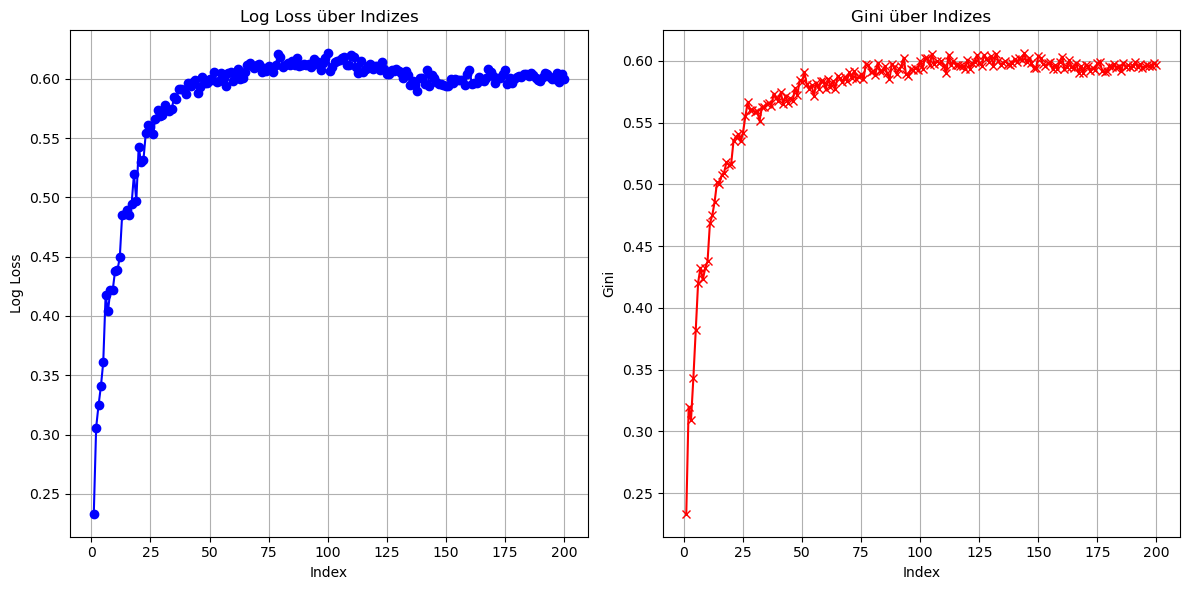

In [102]:
import matplotlib.pyplot as plt
import pandas as pd

# Beispiel-Daten
log_loss = {
    1: 0.23336718067395565,
2: 0.3059842416150827,
3: 0.32464710961005,
4: 0.3406122770736125,
5: 0.3609512410197733,
6: 0.41744774061369055,
7: 0.4039242499408174,
8: 0.421674353141403,
9: 0.42163328239929604,
10: 0.4379553171678973,
11: 0.4385500074245342,
12: 0.44931475431879775,
13: 0.4850885478002036,
14: 0.48565821046858204,
15: 0.48938056853619344,
16: 0.4852116489054656,
17: 0.49442217285581946,
18: 0.5193106243028843,
19: 0.4970725732859358,
20: 0.5426763555186807,
21: 0.5295757237578113,
22: 0.5312719460685801,
23: 0.5538392457324646,
24: 0.5611717987950305,
25: 0.5591716783173304,
26: 0.5529788906816302,
27: 0.5657146574955366,
28: 0.5733614693886971,
29: 0.5685551879567686,
30: 0.5695758598516925,
31: 0.5776775184478992,
32: 0.5733020663705998,
33: 0.5730514093227609,
34: 0.5744467282289409,
35: 0.5847935580303225,
36: 0.5825166010359958,
37: 0.5915501473180311,
38: 0.5916836437132416,
39: 0.5903869330968923,
40: 0.586785641218631,
41: 0.5964181874587711,
42: 0.5940086078621366,
43: 0.5975877812120938,
44: 0.5987286899151394,
45: 0.5881407716344306,
46: 0.5931551484399267,
47: 0.6017901316027017,
48: 0.596032475490196,
49: 0.5963739520063417,
50: 0.5994754858626586,
51: 0.598537111753932,
52: 0.6053035510203342,
53: 0.5968349124823885,
54: 0.5983983553627145,
55: 0.6048762988958766,
56: 0.6001853093739362,
57: 0.5935411708060033,
58: 0.604691486459877,
59: 0.6055622464685265,
60: 0.5982424940377572,
61: 0.6050468941529717,
62: 0.6083365950418325,
63: 0.5995547134163781,
64: 0.600457955355484,
65: 0.6057321888175319,
66: 0.6117885390315883,
67: 0.61287665752338,
68: 0.6103417334748892,
69: 0.6087206952600476,
70: 0.6114852780721454,
71: 0.6127610628618694,
72: 0.6060521452359685,
73: 0.6092506741490823,
74: 0.6060933720949063,
75: 0.6106858485581815,
76: 0.6074416602742174,
77: 0.6058147826323819,
78: 0.6117037218070851,
79: 0.6204333837296909,
80: 0.6187024125520477,
81: 0.6097091864719536,
82: 0.611870336773354,
83: 0.612855262665073,
84: 0.6118609365200888,
85: 0.6145425680337079,
86: 0.611883700329785,
87: 0.6176802425560703,
88: 0.6103847502665318,
89: 0.6112465085820501,
90: 0.6123303341749943,
91: 0.6115841100544527,
92: 0.6121423575986913,
93: 0.6096765139858922,
94: 0.6165044876388523,
95: 0.61250780077023,
96: 0.6142800408173401,
97: 0.6072685215437107,
98: 0.6128597651700951,
99: 0.6172961261939661,
100: 0.6213630378339723,
101: 0.6064280192470245,
102: 0.6096274595347045,
103: 0.6141347188869133,
104: 0.6147355095622443,
105: 0.6159424739577265,
106: 0.6173796974205754,
107: 0.6180939540100239,
108: 0.6115374089512021,
109: 0.6115020908765156,
110: 0.6200922140912533,
111: 0.6181463470200431,
112: 0.6097892925635934,
113: 0.6046944080977212,
114: 0.6147209983797204,
115: 0.6056168819148927,
116: 0.6077649395080652,
117: 0.6109033984683523,
118: 0.6124992419149253,
119: 0.6083371109933889,
120: 0.6105981473906001,
121: 0.6109281573504195,
122: 0.6071299607531492,
123: 0.6140443946528786,
124: 0.6084381261558707,
125: 0.6038763327210599,
126: 0.6038421991180297,
127: 0.6069167403595286,
128: 0.606588633265506,
129: 0.6085711302866873,
130: 0.606677153455504,
131: 0.6046398046398045,
132: 0.6008958170881894,
133: 0.6061398015182283,
134: 0.6032796614735156,
135: 0.5946283080348712,
136: 0.5982453339163016,
137: 0.5946809674012178,
138: 0.589866584670049,
139: 0.6005784301447006,
140: 0.6005333085632403,
141: 0.5959007581869307,
142: 0.6076067207215954,
143: 0.5936585365853658,
144: 0.6032245302342191,
145: 0.6009868661049388,
146: 0.5975467206199865,
147: 0.5957409302788705,
148: 0.5954420848457487,
149: 0.5944494600975563,
150: 0.5937589580152924,
151: 0.5939791406583681,
152: 0.5994873847961918,
153: 0.5967197120235812,
154: 0.5995457134457796,
155: 0.5987499510351743,
156: 0.5990808388533818,
157: 0.5988069470212327,
158: 0.5942910788906963,
159: 0.6038907649652677,
160: 0.6071459719866024,
161: 0.5958353572337489,
162: 0.5962935669241297,
163: 0.5965511988011989,
164: 0.6016988954326195,
165: 0.5988241160850473,
166: 0.5984219270613804,
167: 0.6007016864040134,
168: 0.6079852904041394,
169: 0.6055510373354626,
170: 0.6019695175602591,
171: 0.5966741790189385,
172: 0.6003771055887487,
173: 0.6006040768650045,
174: 0.6040346815958357,
175: 0.6075748596921958,
176: 0.5952430918503632,
177: 0.6004766803374236,
178: 0.5962758182714187,
179: 0.5996048674322963,
180: 0.6017106818986651,
181: 0.6023070320387734,
182: 0.6017487986437138,
183: 0.6043446096672669,
184: 0.6041332156658616,
185: 0.6025162217039381,
186: 0.6045023419703548,
187: 0.6027066940664462,
188: 0.6006344970744926,
189: 0.5988096176462476,
190: 0.5984402116349075,
191: 0.6010712512169982,
192: 0.6044437138437107,
193: 0.6039693874703319,
194: 0.6014040641477434,
195: 0.5998022033176961,
196: 0.5998343883539194,
197: 0.6045540875182421,
198: 0.5974137100397818,
199: 0.6037311310651529,
200: 0.6001197242475482,

}

gini = {
1: 0.23336718067395565,
2: 0.3200979459870673,
3: 0.3093029150823828,
4: 0.34322106163794186,
5: 0.38214023122559704,
6: 0.42031302351019556,
7: 0.4324490348396976,
8: 0.4230617099478968,
9: 0.4319310381342155,
10: 0.4377103455672076,
11: 0.46836023712414143,
12: 0.4749436961644866,
13: 0.4859083938517436,
14: 0.5015249267823588,
15: 0.5006519189310606,
16: 0.5074318234709068,
17: 0.5094455726134242,
18: 0.517997751767907,
19: 0.515663743496845,
20: 0.5167530962422291,
21: 0.5352327793632141,
22: 0.5382989900299338,
23: 0.5404924621896534,
24: 0.5349016623107885,
25: 0.5417508011030456,
26: 0.554982960655875,
27: 0.5665521253021806,
28: 0.5604842067922949,
29: 0.5600662554221579,
30: 0.5588966130561001,
31: 0.5596485435468487,
32: 0.551262008199229,
33: 0.5623190670310979,
34: 0.5628058772408112,
35: 0.565179202404503,
36: 0.5661565533104546,
37: 0.5636228148771223,
38: 0.5734842504021606,
39: 0.5697710071814865,
40: 0.56755220521692,
41: 0.5743907516173001,
42: 0.5650097982971635,
43: 0.5717258628735259,
44: 0.5662090727778417,
45: 0.5699516546471232,
46: 0.5673353018408409,
47: 0.5778996135812069,
48: 0.5725569675984421,
49: 0.584089126984155,
50: 0.5827710459206912,
51: 0.5905304974920262,
52: 0.5809704368665265,
53: 0.5768333086545013,
54: 0.580434709145435,
55: 0.5715244408962253,
56: 0.5819464521280138,
57: 0.577520419675914,
58: 0.5836768388106416,
59: 0.5838401156869993,
60: 0.5769313010901846,
61: 0.5853905527836535,
62: 0.5791834196270187,
63: 0.5835596565872005,
64: 0.5768400745365255,
65: 0.58730998199216,
66: 0.5857468618086068,
67: 0.5829132727432849,
68: 0.5866892776653401,
69: 0.5835736542390321,
70: 0.5908803740991234,
71: 0.5860753838269609,
72: 0.591718548379649,
73: 0.5855402892120884,
74: 0.5870646887876746,
75: 0.5890894362540918,
76: 0.5850219146482122,
77: 0.5976802417411554,
78: 0.5966066235999791,
79: 0.5909052526418951,
80: 0.5914149690791691,
81: 0.588638107450284,
82: 0.5982624647890482,
83: 0.5919376360149863,
84: 0.591690670772064,
85: 0.5956608126535191,
86: 0.5900205384602405,
87: 0.5849451849895879,
88: 0.5977629622172641,
89: 0.5951743906027032,
90: 0.589339686740251,
91: 0.5930468645841316,
92: 0.5956691589027172,
93: 0.6025397308736322,
94: 0.5889068945594607,
95: 0.5880146585017813,
96: 0.5934284646692032,
97: 0.5922325497630925,
98: 0.5940208319390627,
99: 0.5928618271066258,
100: 0.5997715470418019,
101: 0.5936044483227778,
102: 0.6019279708302815,
103: 0.602533213347501,
104: 0.5963334880888964,
105: 0.6056443506081165,
106: 0.5975240593411423,
107: 0.5996407021131478,
108: 0.5980720428506074,
109: 0.5997174959008147,
110: 0.5957889875303568,
111: 0.5897419788378259,
112: 0.604954945505324,
113: 0.5965052851714433,
114: 0.5996444288962524,
115: 0.5968878253051683,
116: 0.5968830911135741,
117: 0.5959090809270695,
118: 0.5954475162322458,
119: 0.5935398169335802,
120: 0.6008621203306549,
121: 0.5935926291360449,
122: 0.598130725778889,
123: 0.5992313861028281,
124: 0.6046693795739174,
125: 0.5982298129263828,
126: 0.5960232860668049,
127: 0.6044030973583031,
128: 0.6016315286809397,
129: 0.5993810173063113,
130: 0.6035635365737249,
131: 0.5960069968790899,
132: 0.6056257429150487,
133: 0.600188405379896,
134: 0.5967969840673589,
135: 0.5984067445432787,
136: 0.5995909999844236,
137: 0.5975813884176463,
138: 0.5965913757219914,
139: 0.598502158495668,
140: 0.601628647696401,
141: 0.5990295963140886,
142: 0.6018796142334553,
143: 0.6005148864906379,
144: 0.6060244873239914,
145: 0.5990622433254885,
146: 0.6024550369665722,
147: 0.5982357369548141,
148: 0.5941325646884903,
149: 0.59390069623016,
150: 0.6039272528846477,
151: 0.6021946692323404,
152: 0.5972795271942584,
153: 0.5961772388549483,
154: 0.5978389785606532,
155: 0.5986978796660438,
156: 0.5937174213925309,
157: 0.5964659126954226,
158: 0.5931876382981576,
159: 0.5989935011466829,
160: 0.6033812717724114,
161: 0.5933660409255077,
162: 0.5952806490489172,
163: 0.6002842780774261,
164: 0.5946705025206782,
165: 0.5938611334270604,
166: 0.5984334586790975,
167: 0.5902319805265897,
168: 0.5957562225473998,
169: 0.5898155905723946,
170: 0.5966538427425229,
171: 0.5959718450678335,
172: 0.5915919146160262,
173: 0.5942350283543748,
174: 0.5922126637654017,
175: 0.5980340959079492,
176: 0.5993834971239988,
177: 0.5917323956786577,
178: 0.5912710229732072,
179: 0.5917924658598762,
180: 0.5954777918279443,
181: 0.5952622380893326,
182: 0.5972004793007989,
183: 0.5944789366774792,
184: 0.5961397893404531,
185: 0.5917107267254932,
186: 0.5982468042046421,
187: 0.5946353029572638,
188: 0.5966010173083319,
189: 0.5953617845136727,
190: 0.5954982432564551,
191: 0.5990859396530512,
192: 0.5946907544251899,
193: 0.5973111028133703,
194: 0.5943374175188729,
195: 0.5954679820852285,
196: 0.5963061032378455,
197: 0.5955680267755166,
198: 0.5958295477843897,
199: 0.5982870428479249,
200: 0.5963349634690889,

}

# Erstellen eines DataFrames
df_log_loss = pd.DataFrame(list(log_loss.items()), columns=["Index", "Log Loss"])
df_gini = pd.DataFrame(list(gini.items()), columns=["Index", "Gini"])

# Plot erstellen
plt.figure(figsize=(12, 6))

# Log Loss plot
plt.subplot(1, 2, 1)
plt.plot(df_log_loss["Index"], df_log_loss["Log Loss"], label="Log Loss", color="b", marker='o')
plt.title('Log Loss über Indizes')
plt.xlabel('Index')
plt.ylabel('Log Loss')
plt.grid(True)

# Gini plot
plt.subplot(1, 2, 2)
plt.plot(df_gini["Index"], df_gini["Gini"], label="Gini", color="r", marker='x')
plt.title('Gini über Indizes')
plt.xlabel('Index')
plt.ylabel('Gini')
plt.grid(True)

# Anzeigen des Plots
plt.tight_layout()
plt.show()


Visualisierung des Baumes: